In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import seaborn as sns

from scipy import stats
from math import sqrt

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 

import acquire
from acquire import get_connection
from acquire import acquire_zillow_2

import wrangle
from wrangle import clean_zillow
from wrangle import split_zillow

import scale
from scale import visualize_scaled_date 

In [2]:
df = acquire_zillow_2()

In [3]:
df.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt,yearbuilt
0,1125.0,3.0,2.0,NaN,289445.0,1974.0
1,1316.0,3.0,2.0,5672.0,205123.0,1923.0
2,1458.0,3.0,2.0,8284.0,136104.0,1970.0
3,1766.0,3.0,2.0,25082.0,810694.0,1980.0
4,1421.0,2.0,1.0,6707.0,35606.0,1911.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38582 entries, 0 to 38581
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   calculatedfinishedsquarefeet  38474 non-null  float64
 1   bedroomcnt                    38582 non-null  float64
 2   bathroomcnt                   38582 non-null  float64
 3   lotsizesquarefeet             34218 non-null  float64
 4   taxvaluedollarcnt             38581 non-null  float64
 5   yearbuilt                     38450 non-null  float64
dtypes: float64(6)
memory usage: 1.8 MB


In [5]:
df.shape

(38582, 6)

In [6]:
df = clean_zillow(df)

In [7]:
df.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt,yearbuilt
0,1125.0,3.0,2.0,0.0,289445.0,1974.0
1,1316.0,3.0,2.0,5672.0,205123.0,1923.0
2,1458.0,3.0,2.0,8284.0,136104.0,1970.0
3,1766.0,3.0,2.0,25082.0,810694.0,1980.0
4,1421.0,2.0,1.0,6707.0,35606.0,1911.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38582 entries, 0 to 38581
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   calculatedfinishedsquarefeet  38582 non-null  float64
 1   bedroomcnt                    38582 non-null  float64
 2   bathroomcnt                   38582 non-null  float64
 3   lotsizesquarefeet             38582 non-null  float64
 4   taxvaluedollarcnt             38582 non-null  float64
 5   yearbuilt                     38582 non-null  float64
dtypes: float64(6)
memory usage: 2.1 MB


### Aquired Data
    - opbained data from the zillow database through a SQl Query
### SQL Query =  
    '''
    SELECT calculatedfinishedsquarefeet, bedroomcnt, bathroomcnt, lotsizesquarefeet, taxvaluedollarcnt
    from  properties_2017
    join predictions_2017 using(parcelid)
    where transactiondate between "2017-05-01" and "2017-08-31"
    and propertylandusetypeid between 260 and 266
    or propertylandusetypeid between 273 and 279
    and not propertylandusetypeid = 274
    and unitcnt = 1;
                        
    '''
    
### Wrangle
    def clean_zillow(df):
    '''
    Takes in a df of zillow_data and cleans the data appropriatly by dropping null values in each column if < 80 percent,
    fills any extra nan with 0,
    return: df, a cleaned pandas data frame.
    '''
    after we have cleaned the data we are left with 38582 records
    

# Split Data


### Split Data
    -  split_zillow(df)
    '''
    this function takes in a dataframe and splits it into 3 samples, 
    a test, which is 20% of the entire dataframe, 
    a validate, which is 24% of the entire dataframe,
    and a train, which is 56% of the entire dataframe. 
    It then splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 3 dataframes:
    train (df), validate,  X_test, 
    '''
    
 ### Address Outliers
     - the data is heavily scewed due to outliers 
     - we will need to address this so that the data is more normaly distributed. 

In [9]:
train, validate, test = split_zillow(df)

In [10]:
train.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt,yearbuilt
34440,993.0,2.0,1.0,27420.0,332874.0,1954.0
9092,1326.0,3.0,2.0,4400.0,444382.0,1964.0
6369,1414.0,3.0,2.5,0.0,225407.0,1985.0
30976,1744.0,4.0,3.0,4558.0,166437.0,1988.0
8815,2966.0,4.0,3.0,8050.0,638507.0,1978.0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21605 entries, 34440 to 16893
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   calculatedfinishedsquarefeet  21605 non-null  float64
 1   bedroomcnt                    21605 non-null  float64
 2   bathroomcnt                   21605 non-null  float64
 3   lotsizesquarefeet             21605 non-null  float64
 4   taxvaluedollarcnt             21605 non-null  float64
 5   yearbuilt                     21605 non-null  float64
dtypes: float64(6)
memory usage: 1.2 MB


In [12]:
train.describe()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt,yearbuilt
count,21605.000000,21605.000000,21605.000000,2.160500e+04,2.160500e+04,21605.000000
mean,1754.186762,3.006897,2.270724,2.558179e+04,4.952424e+05,1962.238324
std,940.546070,1.030456,0.947791,9.349446e+04,6.553387e+05,121.071766
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+03,0.000000
25%,1170.000000,2.000000,2.000000,5.032000e+03,2.081870e+05,1954.000000
50%,1521.000000,3.000000,2.000000,6.868000e+03,3.640780e+05,1970.000000
75%,2070.000000,4.000000,3.000000,1.064000e+04,5.751430e+05,1987.000000
max,17245.000000,12.000000,11.000000,3.589145e+06,2.385837e+07,2016.000000


<AxesSubplot:>

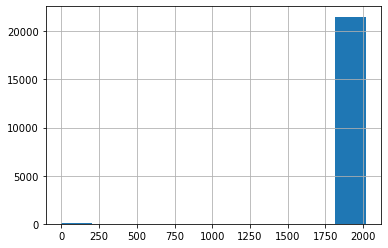

In [13]:
train.yearbuilt.hist()

<AxesSubplot:>

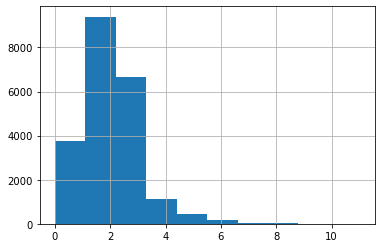

In [14]:
train.bathroomcnt.hist()

<AxesSubplot:>

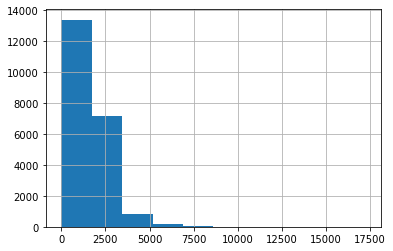

In [15]:
train.calculatedfinishedsquarefeet.hist()

<AxesSubplot:>

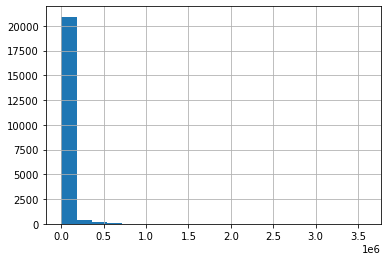

In [16]:
train.lotsizesquarefeet.hist(bins = 20)

In [17]:
train.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt,yearbuilt
34440,993.0,2.0,1.0,27420.0,332874.0,1954.0
9092,1326.0,3.0,2.0,4400.0,444382.0,1964.0
6369,1414.0,3.0,2.5,0.0,225407.0,1985.0
30976,1744.0,4.0,3.0,4558.0,166437.0,1988.0
8815,2966.0,4.0,3.0,8050.0,638507.0,1978.0


In [18]:
train.describe()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt,yearbuilt
count,21605.000000,21605.000000,21605.000000,2.160500e+04,2.160500e+04,21605.000000
mean,1754.186762,3.006897,2.270724,2.558179e+04,4.952424e+05,1962.238324
std,940.546070,1.030456,0.947791,9.349446e+04,6.553387e+05,121.071766
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+03,0.000000
25%,1170.000000,2.000000,2.000000,5.032000e+03,2.081870e+05,1954.000000
50%,1521.000000,3.000000,2.000000,6.868000e+03,3.640780e+05,1970.000000
75%,2070.000000,4.000000,3.000000,1.064000e+04,5.751430e+05,1987.000000
max,17245.000000,12.000000,11.000000,3.589145e+06,2.385837e+07,2016.000000


In [19]:
train.shape

(21605, 6)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21605 entries, 34440 to 16893
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   calculatedfinishedsquarefeet  21605 non-null  float64
 1   bedroomcnt                    21605 non-null  float64
 2   bathroomcnt                   21605 non-null  float64
 3   lotsizesquarefeet             21605 non-null  float64
 4   taxvaluedollarcnt             21605 non-null  float64
 5   yearbuilt                     21605 non-null  float64
dtypes: float64(6)
memory usage: 1.2 MB


# Remove Outliers

### taxvaluedollarcnt

In [21]:
# Let's use IQR for the entire dataset
q1 = df.taxvaluedollarcnt.quantile(.25)
q3 = df.taxvaluedollarcnt.quantile(.75)
q1, q3

(209205.5, 577914.0)

In [22]:
iqr = q3 - q1
iqr

368708.5

In [23]:
multiplier = 1.5
upper_bound = q3 + (multiplier * iqr)
lower_bound = q1 - (multiplier * iqr)

In [24]:
lower_bound

-343857.25

In [25]:
upper_bound

1130976.75

In [26]:
# Let's filter out the low outliers
df = df[df.taxvaluedollarcnt > lower_bound]
# lets say give us everyhting less than the upper bound
df = df[df.taxvaluedollarcnt < upper_bound]
df.shape

(36003, 6)

### calculatedfinishedsquarefeet

In [27]:
# Let's use IQR for the entire dataset
q1 = df.calculatedfinishedsquarefeet.quantile(.25)
q3 = df.calculatedfinishedsquarefeet.quantile(.75)
q1, q3

(1149.0, 1953.0)

In [28]:
iqr = q3 - q1
iqr

804.0

In [29]:
multiplier = 1.5
upper_bound = q3 + (multiplier * iqr)
lower_bound = q1 - (multiplier * iqr)

In [30]:
lower_bound

-57.0

In [31]:
upper_bound

3159.0

In [32]:
# Let's filter out the low outliers
df = df[df.calculatedfinishedsquarefeet > lower_bound]
# lets say give us everyhting less than the upper bound
df = df[df.calculatedfinishedsquarefeet < upper_bound]
df.shape

(34620, 6)

### lotsizesquarefeet

In [33]:
q1 = df.lotsizesquarefeet.quantile(.25)
q3 = df.lotsizesquarefeet.quantile(.75)
q1, q3

(4998.75, 9801.25)

In [34]:
iqr = q3 - q1
iqr

4802.5

In [35]:
multiplier = 1.5
upper_bound = q3 + (multiplier * iqr)
lower_bound = q1 - (multiplier * iqr)

In [36]:
lower_bound

-2205.0

In [37]:
upper_bound

17005.0

In [38]:
# Let's filter out the low outliers
df = df[df.lotsizesquarefeet > lower_bound]
# lets say give us everyhting less than the upper bound
df = df[df.lotsizesquarefeet < upper_bound]
df.shape

(29040, 6)

### bathroomcnt

In [39]:
q1 = df.bathroomcnt.quantile(.25)
q3 = df.bathroomcnt.quantile(.75)
q1, q3

(2.0, 2.5)

In [40]:
iqr = q3 - q1
iqr

0.5

In [41]:
multiplier = 1.5
upper_bound = q3 + (multiplier * iqr)
lower_bound = q1 - (multiplier * iqr)

In [42]:
lower_bound

1.25

In [43]:
upper_bound

3.25

In [44]:
# Let's filter out the low outliers
df = df[df.bathroomcnt > lower_bound]
# lets say give us everyhting less than the upper bound
df = df[df.bathroomcnt < upper_bound]
df.shape

(22634, 6)

In [45]:
q1 = df.yearbuilt.quantile(.25)
q3 = df.yearbuilt.quantile(.75)
q1, q3

(1956.0, 1987.0)

In [46]:
iqr = q3 - q1
iqr

31.0

In [47]:
multiplier = 1.5
upper_bound = q3 + (multiplier * iqr)
lower_bound = q1 - (multiplier * iqr)

In [48]:
# Let's filter out the low outliers
df = df[df.yearbuilt > lower_bound]
# lets say give us everyhting less than the upper bound
df = df[df.yearbuilt < upper_bound]
df.shape

(22558, 6)

(array([ 139.,  616.,  671., 2014., 4944., 4161., 3518., 3158., 2234.,
        1103.]),
 array([1910. , 1920.6, 1931.2, 1941.8, 1952.4, 1963. , 1973.6, 1984.2,
        1994.8, 2005.4, 2016. ]),
 <BarContainer object of 10 artists>)

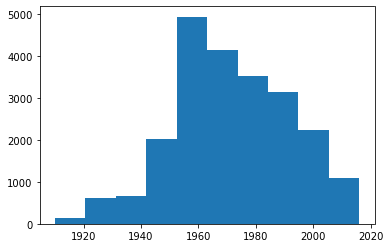

In [49]:
plt.hist(x="yearbuilt", data=df)

(array([1.000e+00, 5.000e+00, 4.550e+02, 4.255e+03, 6.204e+03, 4.901e+03,
        3.037e+03, 1.940e+03, 1.162e+03, 5.980e+02]),
 array([   0. ,  315.6,  631.2,  946.8, 1262.4, 1578. , 1893.6, 2209.2,
        2524.8, 2840.4, 3156. ]),
 <BarContainer object of 10 artists>)

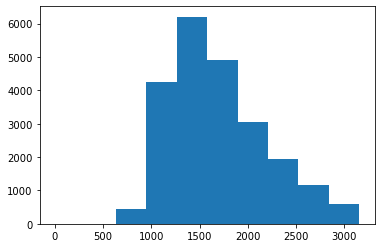

In [50]:
plt.hist(x="calculatedfinishedsquarefeet", data=df)

<AxesSubplot:xlabel='calculatedfinishedsquarefeet'>

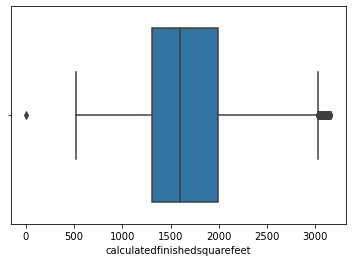

In [51]:
sns.boxplot(x="calculatedfinishedsquarefeet", data=df)

(array([3839., 1134., 2111., 6006., 5301., 1874., 1023.,  605.,  412.,
         253.]),
 array([    0.,  1700.,  3400.,  5100.,  6800.,  8500., 10200., 11900.,
        13600., 15300., 17000.]),
 <BarContainer object of 10 artists>)

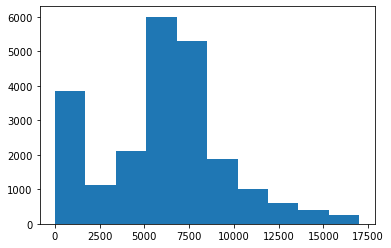

In [52]:
plt.hist(x="lotsizesquarefeet", data=df)

<AxesSubplot:xlabel='lotsizesquarefeet'>

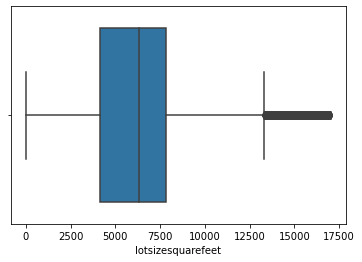

In [53]:
sns.boxplot(x="lotsizesquarefeet", data=df)

(array([6.0000e+00, 1.2600e+02, 4.2490e+03, 1.0993e+04, 6.2540e+03,
        8.3700e+02, 8.5000e+01, 7.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

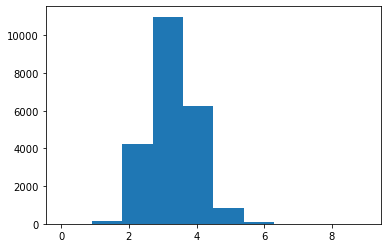

In [54]:
plt.hist(x="bedroomcnt", data=df)

<AxesSubplot:xlabel='bedroomcnt'>

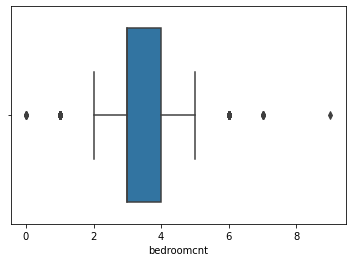

In [55]:
sns.boxplot(x="bedroomcnt", data=df)

<AxesSubplot:xlabel='bathroomcnt'>

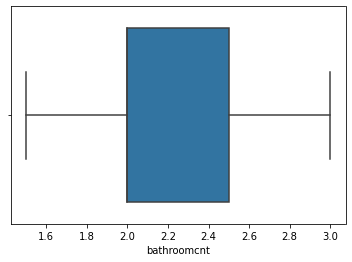

In [56]:
sns.boxplot(x="bathroomcnt", data=df)

# Split Data

In [57]:
train, validate, test = split_zillow(df)

In [58]:
train.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,taxvaluedollarcnt,yearbuilt
16180,1478.0,2.0,2.5,0.0,489323.0,1980.0
22464,1017.0,2.0,1.5,0.0,169874.0,1979.0
4770,1206.0,3.0,2.0,7164.0,142966.0,1984.0
35857,1737.0,3.0,2.0,14670.0,248916.0,1938.0
17106,1423.0,3.0,2.0,5774.0,737112.0,1950.0


# Explore


    - def explore_univariate(X_train, quant_vars):
        for col in quant_vars:
        p, descriptive_stats = explore_univariate_quant(X_train, col)
        plt.show(p)
        print(descriptive_stats)
        
     - The data is now less skewed due to outliers
     
     - Number of Outliers removed:
     
         - calculatedfinishedsquarefeet
             - 2,471
         - lotsizesquarefeet
             - 5,571
         - bathroomcnt
             - 6406



In [59]:
from explore import explore_univariate

In [60]:
quant_vars = ['taxvaluedollarcnt', 'calculatedfinishedsquarefeet','bedroomcnt', 'bathroomcnt', 'lotsizesquarefeet', 'yearbuilt']

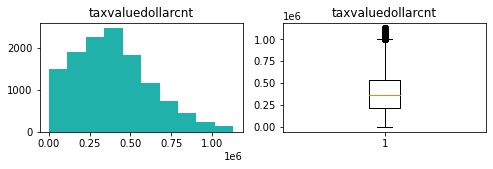

count    1.263200e+04
mean     3.926034e+05
std      2.301581e+05
min      0.000000e+00
25%      2.139575e+05
50%      3.697335e+05
75%      5.319868e+05
max      1.130766e+06
Name: taxvaluedollarcnt, dtype: float64


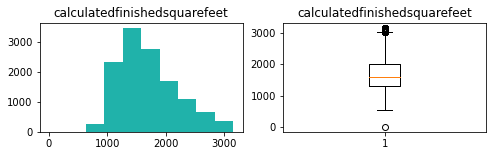

count    12632.000000
mean      1697.064044
std        499.850140
min          0.000000
25%       1315.000000
50%       1601.000000
75%       2001.000000
max       3156.000000
Name: calculatedfinishedsquarefeet, dtype: float64


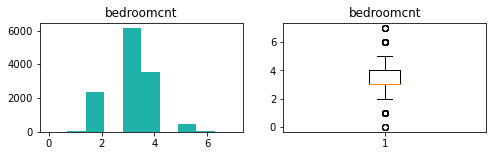

count    12632.000000
mean         3.166244
std          0.809300
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: bedroomcnt, dtype: float64


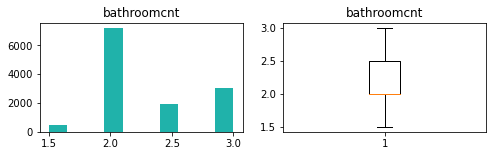

count    12632.000000
mean         2.299873
std          0.445562
min          1.500000
25%          2.000000
50%          2.000000
75%          2.500000
max          3.000000
Name: bathroomcnt, dtype: float64


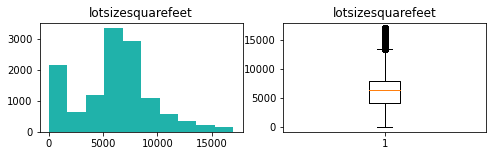

count    12632.000000
mean      6034.327739
std       3646.572748
min          0.000000
25%       4166.750000
50%       6354.500000
75%       7866.250000
max      17000.000000
Name: lotsizesquarefeet, dtype: float64


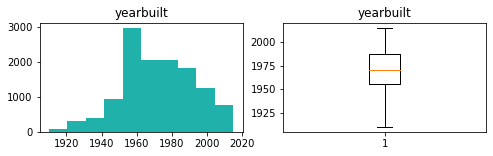

count    12632.000000
mean      1971.300348
std         20.361752
min       1910.000000
25%       1956.000000
50%       1970.000000
75%       1987.000000
max       2015.000000
Name: yearbuilt, dtype: float64


In [61]:
explore_univariate(train, quant_vars)

# Scale Data

In [62]:
from scale import Min_Max_Scaler_2

In [63]:
X_train = train.drop(columns = ['taxvaluedollarcnt'])
X_validate = validate.drop(columns = ['taxvaluedollarcnt'])
X_test = test.drop(columns = ['taxvaluedollarcnt'])

y_train = pd.DataFrame(train.taxvaluedollarcnt)
y_validate = pd.DataFrame(validate.taxvaluedollarcnt)
y_test = pd.DataFrame(test.taxvaluedollarcnt)

In [64]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Min_Max_Scaler_2(X_train, X_validate, X_test)

In [65]:
X_train_scaled.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,yearbuilt
16180,0.468314,0.285714,0.666667,0.000000,0.666667
22464,0.322243,0.285714,0.000000,0.000000,0.657143
4770,0.382129,0.428571,0.333333,0.421412,0.704762
35857,0.550380,0.428571,0.333333,0.862941,0.266667
17106,0.450887,0.428571,0.333333,0.339647,0.380952


In [66]:
X_train_scaled.describe()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,yearbuilt
count,12632.000000,12632.000000,12632.000000,12632.000000,12632.000000
mean,0.537726,0.452321,0.533249,0.354960,0.583813
std,0.158381,0.115614,0.297042,0.214504,0.193921
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.416667,0.428571,0.333333,0.245103,0.438095
50%,0.507288,0.428571,0.333333,0.373794,0.571429
75%,0.634030,0.571429,0.666667,0.462721,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [68]:
X_train = pd.concat([X_train_scaled, y_train,], axis = 1)
X_validate = pd.concat([X_validate_scaled, y_validate,], axis = 1)
X_test = pd.concat([X_test_scaled, y_test,], axis = 1)

In [69]:
X_train.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt
16180,0.468314,0.285714,0.666667,0.000000,0.666667,489323.0
22464,0.322243,0.285714,0.000000,0.000000,0.657143,169874.0
4770,0.382129,0.428571,0.333333,0.421412,0.704762,142966.0
35857,0.550380,0.428571,0.333333,0.862941,0.266667,248916.0
17106,0.450887,0.428571,0.333333,0.339647,0.380952,737112.0


In [70]:
from statsmodels.formula.api import ols

model = ols('taxvaluedollarcnt ~ calculatedfinishedsquarefeet + bedroomcnt + bathroomcnt + lotsizesquarefeet + yearbuilt' , data=X_train).fit()  
predictions = model.predict(X_train)

In [71]:
X_train['yhat'] = predictions
X_train['baseline'] = X_train.taxvaluedollarcnt.mean()

In [72]:
X_train.head()

,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt,yhat,baseline
16180,0.468314,0.285714,0.666667,0.000000,0.666667,489323.0,445929.720735,392603.439202
22464,0.322243,0.285714,0.000000,0.000000,0.657143,169874.0,308966.564794,392603.439202
4770,0.382129,0.428571,0.333333,0.421412,0.704762,142966.0,293708.577571,392603.439202
35857,0.550380,0.428571,0.333333,0.862941,0.266667,248916.0,339313.094558,392603.439202
17106,0.450887,0.428571,0.333333,0.339647,0.380952,737112.0,322813.869811,392603.439202


In [73]:
cor = X_train.drop(columns = ['yhat','baseline'])

<AxesSubplot:>

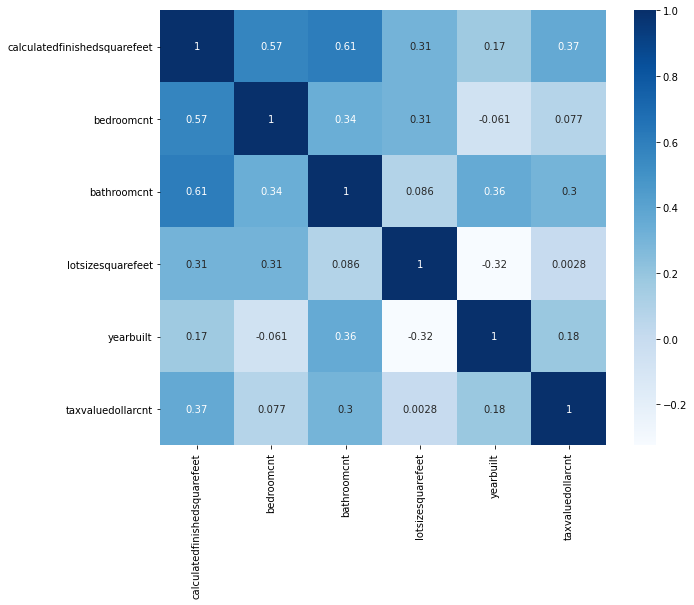

In [74]:
plt.figure(figsize=(10,8))
sns.heatmap(cor.corr(), cmap='Blues', annot=True)

# Take aways 
    - the strongest corr is calcualted square feet on the target of taxvaluesdollarcnt. 
        - corr = .36
    - The secound strongest corr is bathroomcnt.
        - corr = .29
    - Next we will want to do some stats tests to confirm
    - There seems do be a weak negative corr for lotsize

# Stat Tests

Reject Ho 0.18433021813390613 6.007950930947135e-97


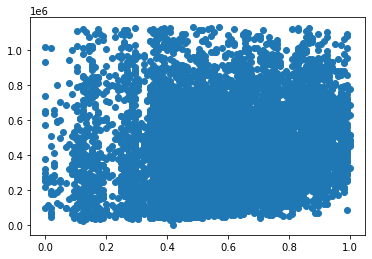

In [75]:
Ho = "No correlation between yearbuilt and home value."
Ha = "There IS a correlation between yearbuilt and home value."
confidence_level = .95
a = 1 - confidence_level

x1 = X_train.yearbuilt
y1 = X_train.taxvaluedollarcnt
plt.scatter(x1, y1)

corr, p = stats.pearsonr(x1, y1)

if p < a:
    print ('Reject Ho', corr, p)
else:
    print ('Fail To Reject Ho', corr, p)

Reject Ho 0.3676634697926782 0.0


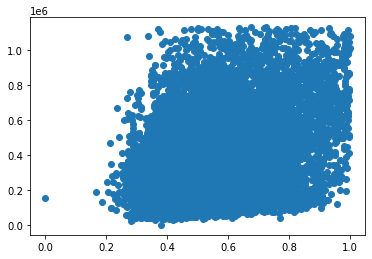

In [76]:
Ho = "No correlation between square footage and home value."
Ha = "There IS a correlation between square footage and home value."
confidence_level = .95
a = 1 - confidence_level

x1 = X_train.calculatedfinishedsquarefeet
y1 = X_train.taxvaluedollarcnt
plt.scatter(x1, y1)

corr, p = stats.pearsonr(x1, y1)

if p < a:
    print ('Reject Ho', corr, p)
else:
    print ('Fail To Reject Ho', corr, p)

Reject Ho 0.07679473902737986 5.473757128414561e-18


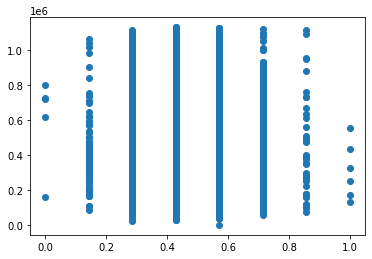

In [77]:
Ho = "No correlation between bedroomscnt and home value."
Ha = "There IS a correlation between bedroomscnt and home value."
confidence_level = .95
a = 1 - confidence_level

x1 = X_train.bedroomcnt
y1 = X_train.taxvaluedollarcnt
plt.scatter(x1, y1)

corr, p = stats.pearsonr(x1, y1)

if p < a:
    print ('Reject Ho', corr, p)
else:
    print ('Fail To Reject Ho', corr, p)

Reject Ho 0.30243180098563915 1.9855360079290047e-265


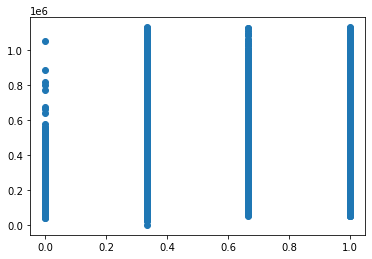

In [78]:
Ho = "No correlation between bathroomcnt and home value."
Ha = "There IS a correlation between bathroomcnt and home value."
confidence_level = .95
a = 1 - confidence_level

x1 = X_train.bathroomcnt
y1 = X_train.taxvaluedollarcnt
plt.scatter(x1, y1)

corr, p = stats.pearsonr(x1, y1)

if p < a:
    print ('Reject Ho', corr, p)
else:
    print ('Fail To Reject Ho', corr, p)

Fail To Reject Ho 0.002817161928696847 0.7515499900409303


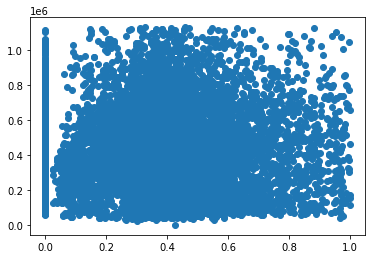

In [79]:
Ho = "No correlation between lotsizesquarefeet and home value."
Ha = "There IS a correlation between lotsizesquarefeet and home value."
confidence_level = .95
a = 1 - confidence_level

x1 = X_train.lotsizesquarefeet
y1 = X_train.taxvaluedollarcnt
plt.scatter(x1, y1)

corr, p = stats.pearsonr(x1, y1)

if p < a:
    print ('Reject Ho', corr, p)
else:
    print ('Fail To Reject Ho', corr, p)

### Take Aways 
    - there is some corr with features: square feet, bathroomcnt, bedroomcnt.
    - there seems to be no correlation with lot size with the target.
        - Id like to see which lot sizes are in each pips code. and then run the pips aginst the target to see how pips relate to the target.


# Evaluate

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='taxvaluedollarcnt'>

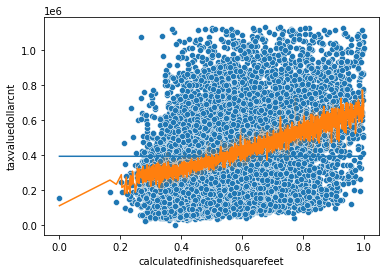

In [80]:
sns.scatterplot(x = 'calculatedfinishedsquarefeet', y = 'taxvaluedollarcnt', data = X_train)
sns.lineplot(x = 'calculatedfinishedsquarefeet', y = 'baseline', data = X_train)
sns.lineplot(x = 'calculatedfinishedsquarefeet', y = 'yhat', data = X_train)

In [81]:
X_train['residual'] = X_train.taxvaluedollarcnt - X_train.yhat
X_train['baseline_residual'] = X_train.taxvaluedollarcnt - X_train.baseline

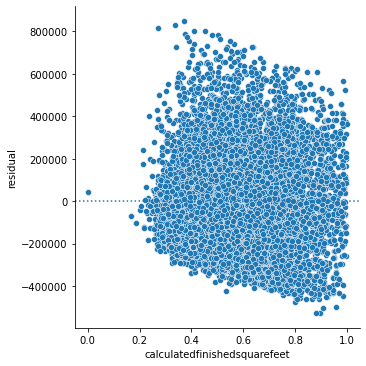

In [82]:
sns.relplot(x = 'calculatedfinishedsquarefeet', y = 'residual', data = X_train)
plt.axhline(0, ls = ':')

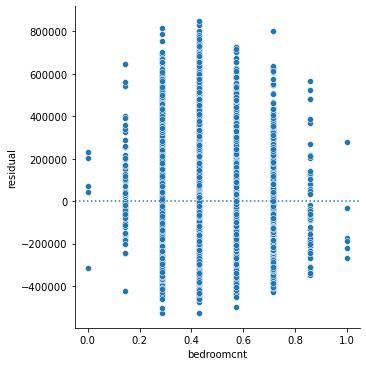

In [83]:
sns.relplot(x = 'bedroomcnt', y = 'residual', data = X_train)
plt.axhline(0, ls = ':')

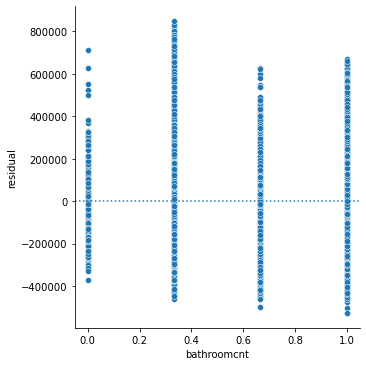

In [84]:
sns.relplot(x = 'bathroomcnt', y = 'residual', data = X_train)
plt.axhline(0, ls = ':')

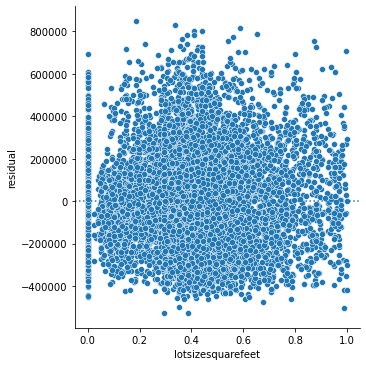

In [85]:
sns.relplot(x = 'lotsizesquarefeet', y = 'residual', data = X_train)
plt.axhline(0, ls = ':')

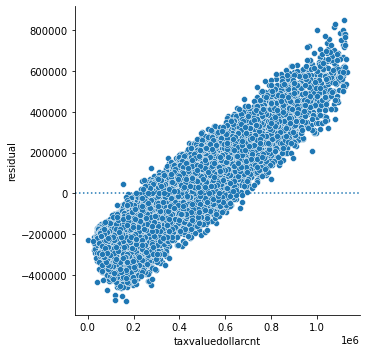

In [86]:
sns.relplot(x = 'taxvaluedollarcnt', y = 'residual', data = X_train)
plt.axhline(0, ls = ':')

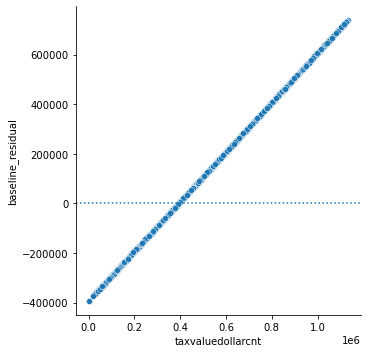

In [87]:
sns.relplot(x = 'taxvaluedollarcnt', y = 'baseline_residual', data = X_train)
plt.axhline(0, ls = ':')

In [88]:
SSE = (X_train.residual**2).sum()
print(f' The SSE of the OLS model is {round(SSE,1)}')

 The SSE of the OLS model is 550117338764900.8


In [89]:
SSE_baseline = (X_train.baseline_residual**2).sum()
print(f' The SSE of the baseline model is {round(SSE_baseline,1)}')

 The SSE of the baseline model is 669098839941757.4


In [90]:
MSE = SSE/len(X_train)
print(f' The MSE of the OLS model is {round(MSE,1)}')

 The MSE of the OLS model is 43549504335.4


In [91]:
MSE_baseline = SSE_baseline/len(X_train)
print(f' The MSE of the baseline model is {round(MSE_baseline,1)}')

 The MSE of the baseline model is 52968559210.1


In [92]:
RMSE = mean_squared_error(X_train.taxvaluedollarcnt, X_train.yhat, squared = False)
print(f' The RMSE of the OLS model is {round(RMSE,1)}')

 The RMSE of the OLS model is 208685.2


In [93]:
RMSE_baseline = mean_squared_error(X_train.taxvaluedollarcnt, X_train.baseline, squared = False)
print(f' The RMSE of the baseline model is {round(RMSE_baseline,1)}')

 The RMSE of the baseline model is 230149.0


In [94]:
import numpy as np
df_eval = pd.DataFrame(np.array(['SSE', 'MSE','RMSE']), columns=['metric'])
df_eval['model_error'] = np.array([SSE,  MSE, RMSE])


df_eval

,metric,model_error
0,SSE,5.501173e+14
1,MSE,4.354950e+10
2,RMSE,2.086852e+05


In [95]:
df_eval['baseline_error'] = np.array([SSE_baseline,MSE_baseline, RMSE_baseline])

df_eval

,metric,model_error,baseline_error
0,SSE,5.501173e+14,6.690988e+14
1,MSE,4.354950e+10,5.296856e+10
2,RMSE,2.086852e+05,2.301490e+05


In [96]:
df_eval['better_than_baseline'] = df_eval.baseline_error > df_eval.model_error

In [97]:
df_eval

,metric,model_error,baseline_error,better_than_baseline
0,SSE,5.501173e+14,6.690988e+14,True
1,MSE,4.354950e+10,5.296856e+10,True
2,RMSE,2.086852e+05,2.301490e+05,True


In [98]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxvaluedollarcnt   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     546.2
Date:                Tue, 23 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:39:28   Log-Likelihood:            -1.7265e+05
No. Observations:               12632   AIC:                         3.453e+05
Df Residuals:                   12626   BIC:                         3.454e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     1.704e+05   1.04e+04     16.363      0.000     1.5e+05    1.91e+05
calculatedfinishedsquarefeet  6.098e+05   1.75e+04     34.936      0.000    5.76e+05    6.44e+05
bedroomcnt                   -3.356e+05      2e+04    -16.764      0.000   -3.75e+05   -2.96e+05
bathroomcnt                   7.102e+04   8382.246      8.472      0.000    5.46e+04    8.74e+04
lotsizesquarefeet             -7.18e+04      1e+04     -7.178      0.000   -9.14e+04   -5.22e+04
yearbuilt                     5.772e+04   1.13e+04      5.131      0.000    3.57e+04    7.98e+04
==============================================================================
Omnibus:                      474.880   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              528.982
Skew:                           0.496   Prob(JB):                    1.36e-115
Kurtosis:                       3.148   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Take Aways
    - RMSE proves to have the best fit for the data and is better than baseline model
    - R^2 values is = .168 (low due to low number of features, to imporve add more featurs into model or do some FE)
### Details:  
    - calcualted square feet has a coef = 6.12e+05 (the mean response value increases by 6.12e+05 for every one unit change in the predicted.)
    - bedroomcnt has a coef = -3.198e+05 (the mean response value increases by -3.198e+05 for every one unit change in the predicted.)
    - bathroomcnt has a coef = 7.704e+04 (the mean response value increases by 7.704e+04 for every one unit change in the predicted.)
    - lotsizesquarefeet has a coef = -9.952e+04 (the mean response value increases by -9.952e+04 for every one unit change in the predicted.)

In [99]:
baseline_mean = y_train['taxvaluedollarcnt'].mean()
baseline_med = y_train['taxvaluedollarcnt'].median()
y_train['baseline_mean'] = baseline_mean
y_train['baseline_med'] = baseline_med

y_validate['baseline_mean'] = baseline_mean
y_validate['baseline_med'] = baseline_med

In [100]:
y_train.head()

,taxvaluedollarcnt,baseline_mean,baseline_med
16180,489323.0,392603.439202,369733.5
22464,169874.0,392603.439202,369733.5
4770,142966.0,392603.439202,369733.5
35857,248916.0,392603.439202,369733.5
17106,737112.0,392603.439202,369733.5


In [101]:
# 2. RMSE of hv_pred_median
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.baseline_med) ** (0.5)
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.baseline_med) ** (0.5)

rmse_train1 = mean_squared_error(y_train.taxvaluedollarcnt, y_train.baseline_mean) ** (0.5)
rmse_validate1 = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.baseline_mean) ** (0.5)

print(f"""
      BASELINE:
      
      RMSE using Median
      Train/In-Sample: {round(rmse_train, 2)}
      Validate/Out-of-Sample: {round(rmse_validate, 2)}
        """)
print(f"""
      BASELINE:
      
      RMSE using Mean
      Train/In-Sample: {round(rmse_train1, 2)}
      Validate/Out-of-Sample: {round(rmse_validate1, 2)}
        """)


      BASELINE:
      
      RMSE using Median
      Train/In-Sample: 231282.5
      Validate/Out-of-Sample: 227629.54
        

      BASELINE:
      
      RMSE using Mean
      Train/In-Sample: 230148.99
      Validate/Out-of-Sample: 226956.85
        


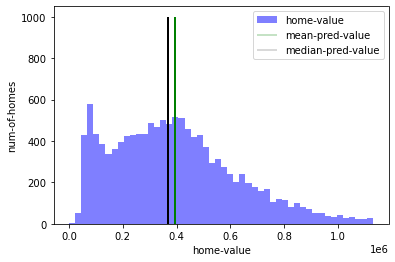

In [102]:
import matplotlib.ticker as plticker
# plot to visualize actual vs predicted. 
plt.hist(y_train.taxvaluedollarcnt, color='blue', alpha=.5, label="home-value", bins = 50)
plt.vlines(y_train.baseline_mean, 0, 1000, color='green', alpha=.3, label="mean-pred-value")
plt.vlines(y_train.baseline_med, 0, 1000, color='black', alpha=.2, label="median-pred-value")
plt.xlabel("home-value")
plt.ylabel("num-of-homes")
plt.legend()
plt.show()

# Modeling

In [103]:
y_train.head()

,taxvaluedollarcnt,baseline_mean,baseline_med
16180,489323.0,392603.439202,369733.5
22464,169874.0,392603.439202,369733.5
4770,142966.0,392603.439202,369733.5
35857,248916.0,392603.439202,369733.5
17106,737112.0,392603.439202,369733.5


### OLS Model

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [105]:
X_train = X_train.drop(columns=['taxvaluedollarcnt','baseline_residual', 'residual','yhat' ])

In [106]:
# create the model object (Best Model)
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lm'] = lm.predict(X_train)

# evaluate: rmse
rmse_train_lm = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm)**(0.5)

# predict validate
y_validate['taxvaluedollarcnt_pred_lm'] = lm.predict(X_validate)

# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm)**(0.5)

print(f"""
        BASELINE:
              
        RMSE using Median
        Train/In-Sample: {round(rmse_train, 2)}
        Validate/Out-of-Sample: {round(rmse_validate, 2)}

        RMSE for OLS using LinearRegression
    
        Training/In-Sample: {round(rmse_train_lm, 2)}
        Validation/Out-of-Sample: {round(rmse_validate_lm, 2)}
        
        """)




        BASELINE:
              
        RMSE using Median
        Train/In-Sample: 231282.5
        Validate/Out-of-Sample: 227629.54

        RMSE for OLS using LinearRegression
    
        Training/In-Sample: 208685.18
        Validation/Out-of-Sample: 930215.37
        
        


### LassoLars Model

In [107]:
# create the model object
# I will leave α as the defaulted 1 for now
# since DF has a small amt of features.
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lars'] = lars.predict(X_train)

# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lars)**(0.5)

# predict validate
y_validate['taxvaluedollarcnt_pred_lars'] = lars.predict(X_validate)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lars)**(0.5)

print(f"""

        RMSE for LassoLars
    
        Training/In-Sample: {round(rmse_train_lars, 2)}
        Validation/Out-of-Sample: {round(rmse_validate_lars, 2)}
        
        """)



        RMSE for LassoLars
    
        Training/In-Sample: 208685.36
        Validation/Out-of-Sample: 208906.14
        
        


### TweedieRegressor (GLM)

In [108]:
# create the model object
glm = TweedieRegressor(power=1, alpha=0)


# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
glm.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_glm'] = glm.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_glm) ** (1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_glm) ** (1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)




RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  210243.15495775494 
Validation/Out-of-Sample:  210243.15495775494


### Polynomial Regression

In [109]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 =  pf.transform(X_test)

In [110]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train, y_train.taxvaluedollarcnt)

# predict train
y_train['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_train)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.taxvaluedollarcnt, y_train.taxvaluedollarcnt_pred_lm2) ** (1/2)

# predict validate
y_validate['taxvaluedollarcnt_pred_lm2'] = lm2.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm2) ** (1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  208685.17996113218 
Validation/Out-of-Sample:  930215.3740066836


# Evaluate Models w/Visual 

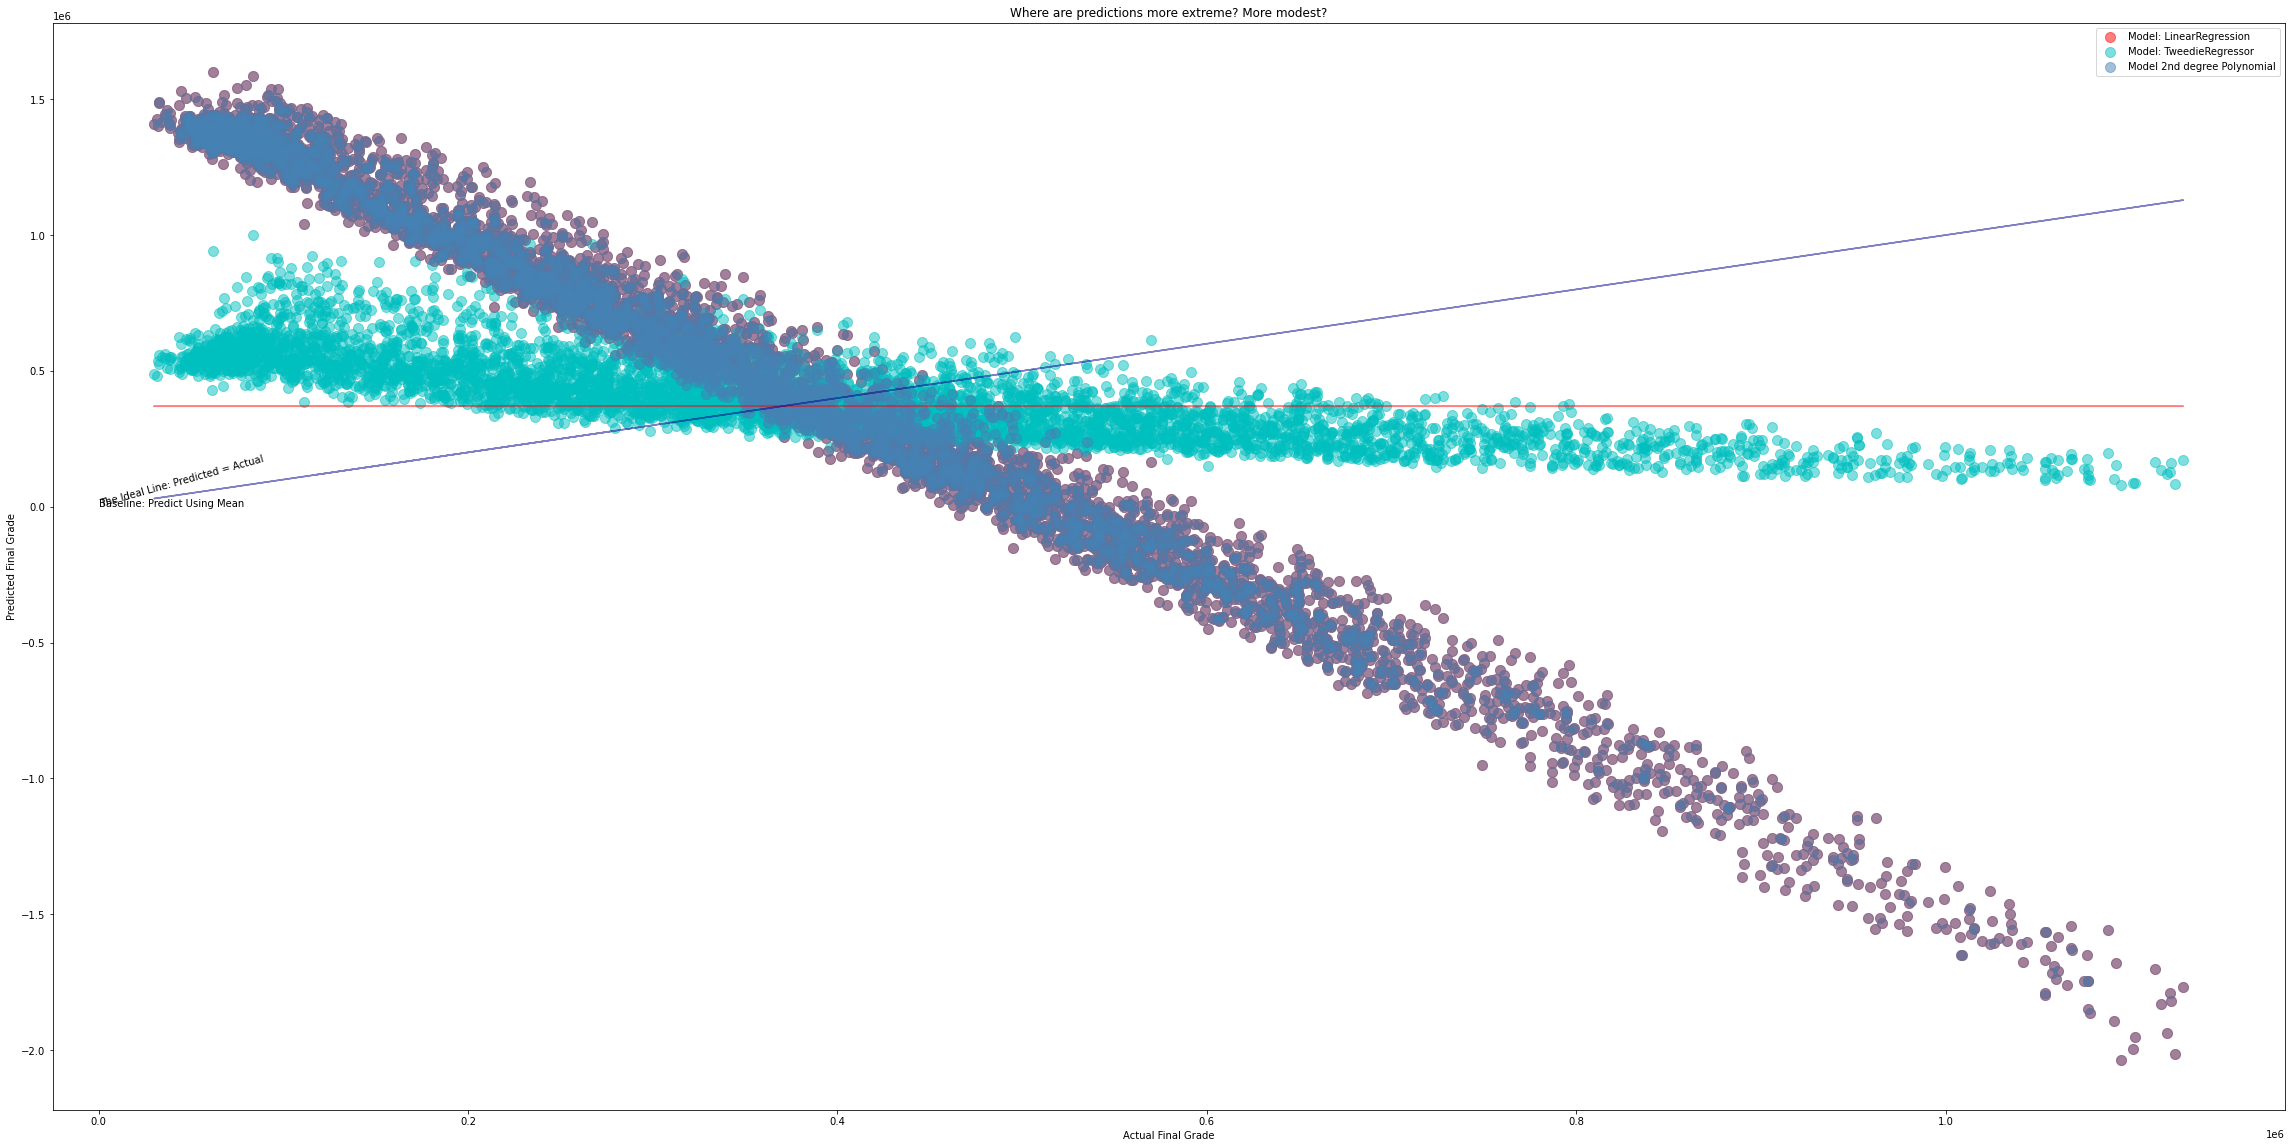

In [111]:
# y_validate.head()
plt.figure(figsize=(40,20))
plt.plot(y_validate.taxvaluedollarcnt, y_validate.baseline_med, alpha=.5, color="Red", label='_nolegend_')
plt.annotate("Baseline: Predict Using Mean", (16, 9.5))
plt.plot(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt, alpha=.5, color="Darkblue", label='_nolegend_')
plt.annotate("The Ideal Line: Predicted = Actual", (.5, 3.5), rotation=15.5)

plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_glm, 
            alpha=.5, color="c", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.taxvaluedollarcnt, y_validate.taxvaluedollarcnt_pred_lm2, 
            alpha=.5, color="steelblue", s=100, label="Model 2nd degree Polynomial")
plt.legend()
plt.xlabel("Actual Final Grade")
plt.ylabel("Predicted Final Grade")
plt.title("Where are predictions more extreme? More modest?")
# plt.annotate("The polynomial model appears to overreact to noise", (2.0, -10))
# plt.annotate("The OLS model (LinearRegression)\n appears to be most consistent", (15.5, 3))
plt.show()


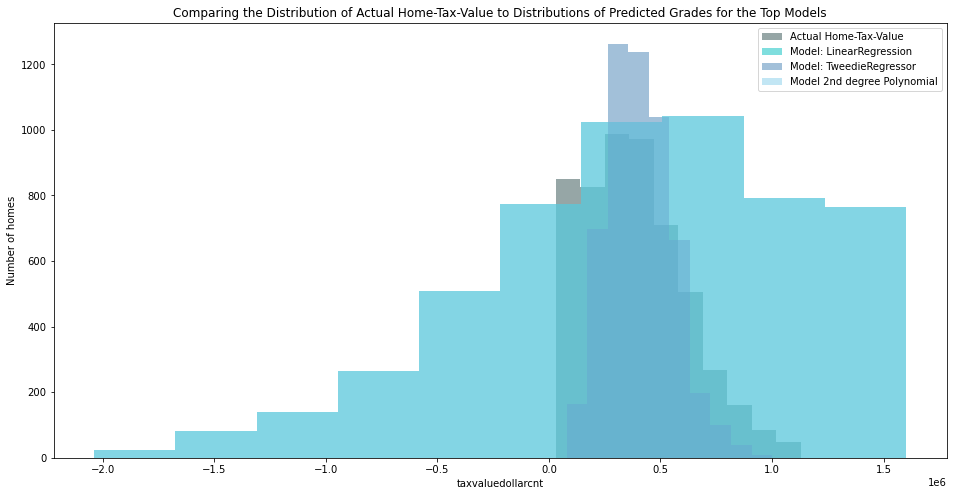

In [112]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.taxvaluedollarcnt, color='darkslategrey', alpha=.5, label="Actual Home-Tax-Value")
plt.hist(y_validate.taxvaluedollarcnt_pred_lm, color='c', alpha=.5, label="Model: LinearRegression")
plt.hist(y_validate.taxvaluedollarcnt_pred_glm, color='steelblue', alpha=.5, label="Model: TweedieRegressor")
plt.hist(y_validate.taxvaluedollarcnt_pred_lm2, color='skyblue', alpha=.5, label="Model 2nd degree Polynomial")
plt.xlabel("taxvaluedollarcnt")
plt.ylabel("Number of homes")
plt.title("Comparing the Distribution of Actual Home-Tax-Value to Distributions of Predicted Grades for the Top Models")
plt.legend()
plt.show()



(array([850., 826., 987., 972., 711., 506., 268., 161.,  85.,  48.]),
 array([  29991. ,  139857.1,  249723.2,  359589.3,  469455.4,  579321.5,
         689187.6,  799053.7,  908919.8, 1018785.9, 1128652. ]),
 <BarContainer object of 10 artists>)

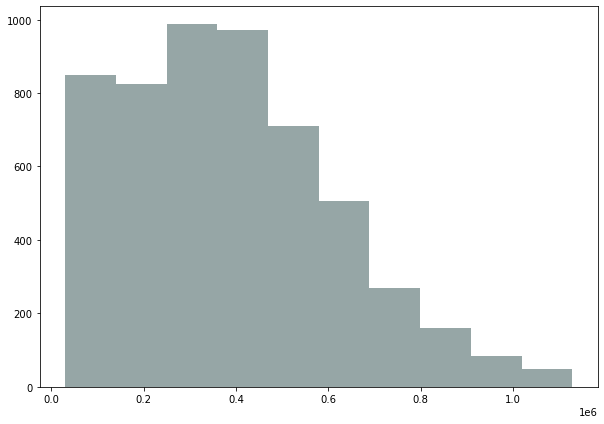

In [113]:
plt.figure(figsize=(10,7))
plt.hist(y_validate.taxvaluedollarcnt, color='darkslategrey', alpha=.5, label="Actual Home-Tax-Value")

(array([  25.,   82.,  140.,  264.,  509.,  774., 1023., 1041.,  791.,
         765.]),
 array([-2038117.75986345, -1674282.28039048, -1310446.8009175 ,
         -946611.32144452,  -582775.84197154,  -218940.36249856,
          144895.11697442,   508730.5964474 ,   872566.07592037,
         1236401.55539335,  1600237.03486633]),
 <BarContainer object of 10 artists>)

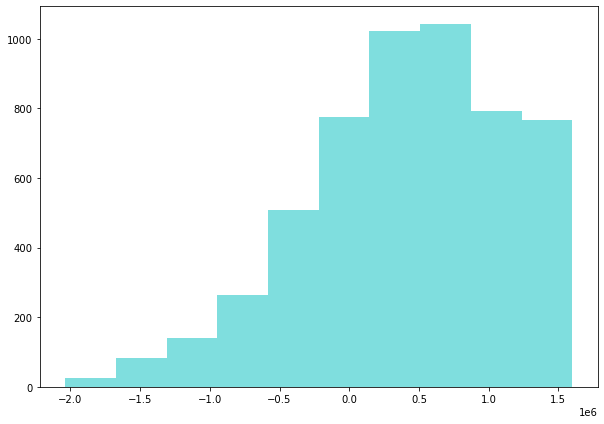

In [114]:
plt.figure(figsize=(10,7))
plt.hist(y_validate.taxvaluedollarcnt_pred_lm, color='c', alpha=.5, label="Model: LinearRegression")

(array([ 164.,  698., 1263., 1238., 1038.,  665.,  199.,  101.,   39.,
           9.]),
 array([  80432.09391281,  172390.27209381,  264348.45027481,
         356306.62845581,  448264.8066368 ,  540222.9848178 ,
         632181.1629988 ,  724139.3411798 ,  816097.5193608 ,
         908055.6975418 , 1000013.8757228 ]),
 <BarContainer object of 10 artists>)

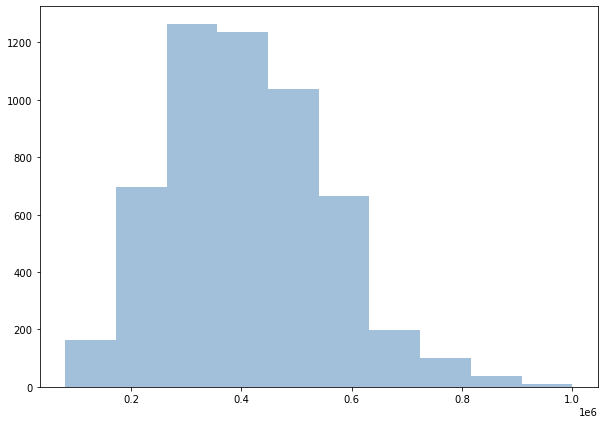

In [115]:
plt.figure(figsize=(10,7))
plt.hist(y_validate.taxvaluedollarcnt_pred_glm, color='steelblue', alpha=.5, label="Model: TweedieRegressor")

(array([  25.,   82.,  140.,  264.,  509.,  774., 1023., 1041.,  791.,
         765.]),
 array([-2038117.75986345, -1674282.28039048, -1310446.8009175 ,
         -946611.32144452,  -582775.84197154,  -218940.36249856,
          144895.11697442,   508730.5964474 ,   872566.07592037,
         1236401.55539335,  1600237.03486633]),
 <BarContainer object of 10 artists>)

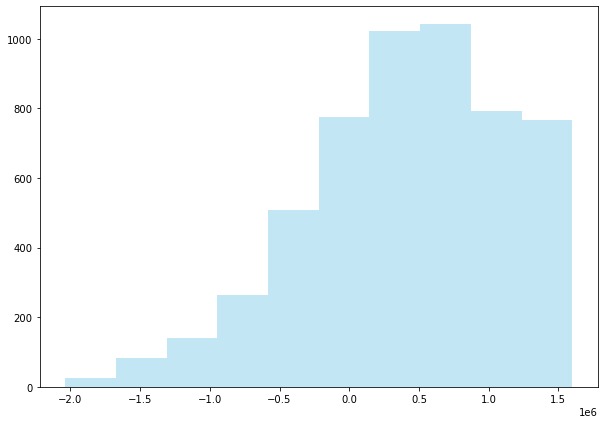

In [116]:
plt.figure(figsize=(10,7))
plt.hist(y_validate.taxvaluedollarcnt_pred_lm2, color='skyblue', alpha=.5, label="Model 2nd degree Polynomial")